# Bike Sharing System

## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Understanding Data

In [1]:
#importing packages

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike_df = pd.read_csv("day.csv")

In [3]:
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_df.shape

(730, 16)

In [6]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike_df['dteday'].value_counts()
print(max(bike_df['dteday']))
print(min(bike_df['dteday']))
bike_df['yr'].value_counts()

31-12-2019
01-01-2018


1    365
0    365
Name: yr, dtype: int64

In [8]:
#Analyse the categorical variables
cat_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

for var in cat_vars:
    print(bike_df[var].value_counts())

print(bike_df[['holiday','workingday','weekday']].value_counts())

#weekend can be derived from holiday and working day, hence no need to create a new variable for weekend
#holiday,workingday
#1,0 => represents holiday
#0,1 => represents working day
#0,0 => represents weekend

3    188
2    184
1    180
4    178
Name: season, dtype: int64
1    365
0    365
Name: yr, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64
holiday  workingday  weekday
0        0           6          105
                     0          105
         1           2          103
                     5          102
                     4          102
                     3          102
                     1           90
1        0           1           15
                     5            2
                     4            2
                     3            1
                     2            1
dtype: int64


## Observation:
- Dataset has 730 rows and 16 columns
- No missing values
- The Datatype of the fields looks correct
- 'instant': record index - This field indicates the index of the record. Can be removed from analysis.
- The data is for 2 years 2018 and 2019. 'yr', 'mnth', 'weekday','holiday' and 'workingday' represents the field 'dteday'. 'dteday' can be removed from analysis.
- The following fields are categorical, but represented in numeric values
    - season : season (1:spring, 2:summer, 3:fall, 4:winter)
    - yr : year (0: 2018, 1:2019)
    - mnth : month ( 1 to 12)
    - holiday : whether day is a holiday or not
    - weekday : day of the week
    - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
    - weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- Below are numeric variables:
    - temp : temperature in Celsius
    - atemp: feeling temperature in Celsius
    - hum: humidity
    - windspeed: wind speed
    - casual: count of casual users
    - registered: count of registered users
    - cnt: count of total rental bikes including both casual and registered
- Target variable : "cnt"
- 'cnt' represent both 'casual' and 'registered' users. Fields 'casual', 'registered' can be removed from analysis.
- weekend can be derived from 'holiday' and 'workingday', hence no need to create a new variable for weekend

## Pre Processing Data

In [9]:
#Columns to drop
cols_to_drop = ['instant','dteday','casual','registered']
bike_pre_process = bike_df.drop(cols_to_drop, axis=1)
bike_pre_process.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [10]:
#Replace the numeric values for categorical variables with proper values for better interpretation

#season : season (1:spring, 2:summer, 3:fall, 4:winter)
bike_pre_process['season'] = bike_pre_process['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

#yr : year (0: 2018, 1:2019) => Replace the values for better analysis.
bike_pre_process['yr'] = bike_pre_process['yr'].map({0:'2018',1:'2019'})
#mnth : month ( 1 to 12) => 1 to 12 : Jan to Dec.
bike_pre_process['mnth'] = bike_pre_process['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
                                                             
#weekday : day of the week => 0 to 6 : Sun to Sat
bike_pre_process['weekday'] = bike_pre_process['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

#holiday : whether day is a holiday or not => Not replacing, as the values are 0 or 1
#workingday : if day is neither weekend nor holiday is 1, otherwise is 0. => Not replacing, as the values are 0 or 1

#weathersit : [Map 1 to 4 as below]
#1: Clear, Few clouds, Partly cloudy, Partly cloudy ==> Clear
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ==> Mist/Cloudy
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds ==> Light Rain/Light Snow
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog ==> Heavy Rain/Snow
bike_pre_process['weathersit'] = bike_pre_process['weathersit'].map({1:'Clear',2:'Mist/Cloudy',3:'Light Rain/Light Snow',4:'Heavy Rain/Snow'})

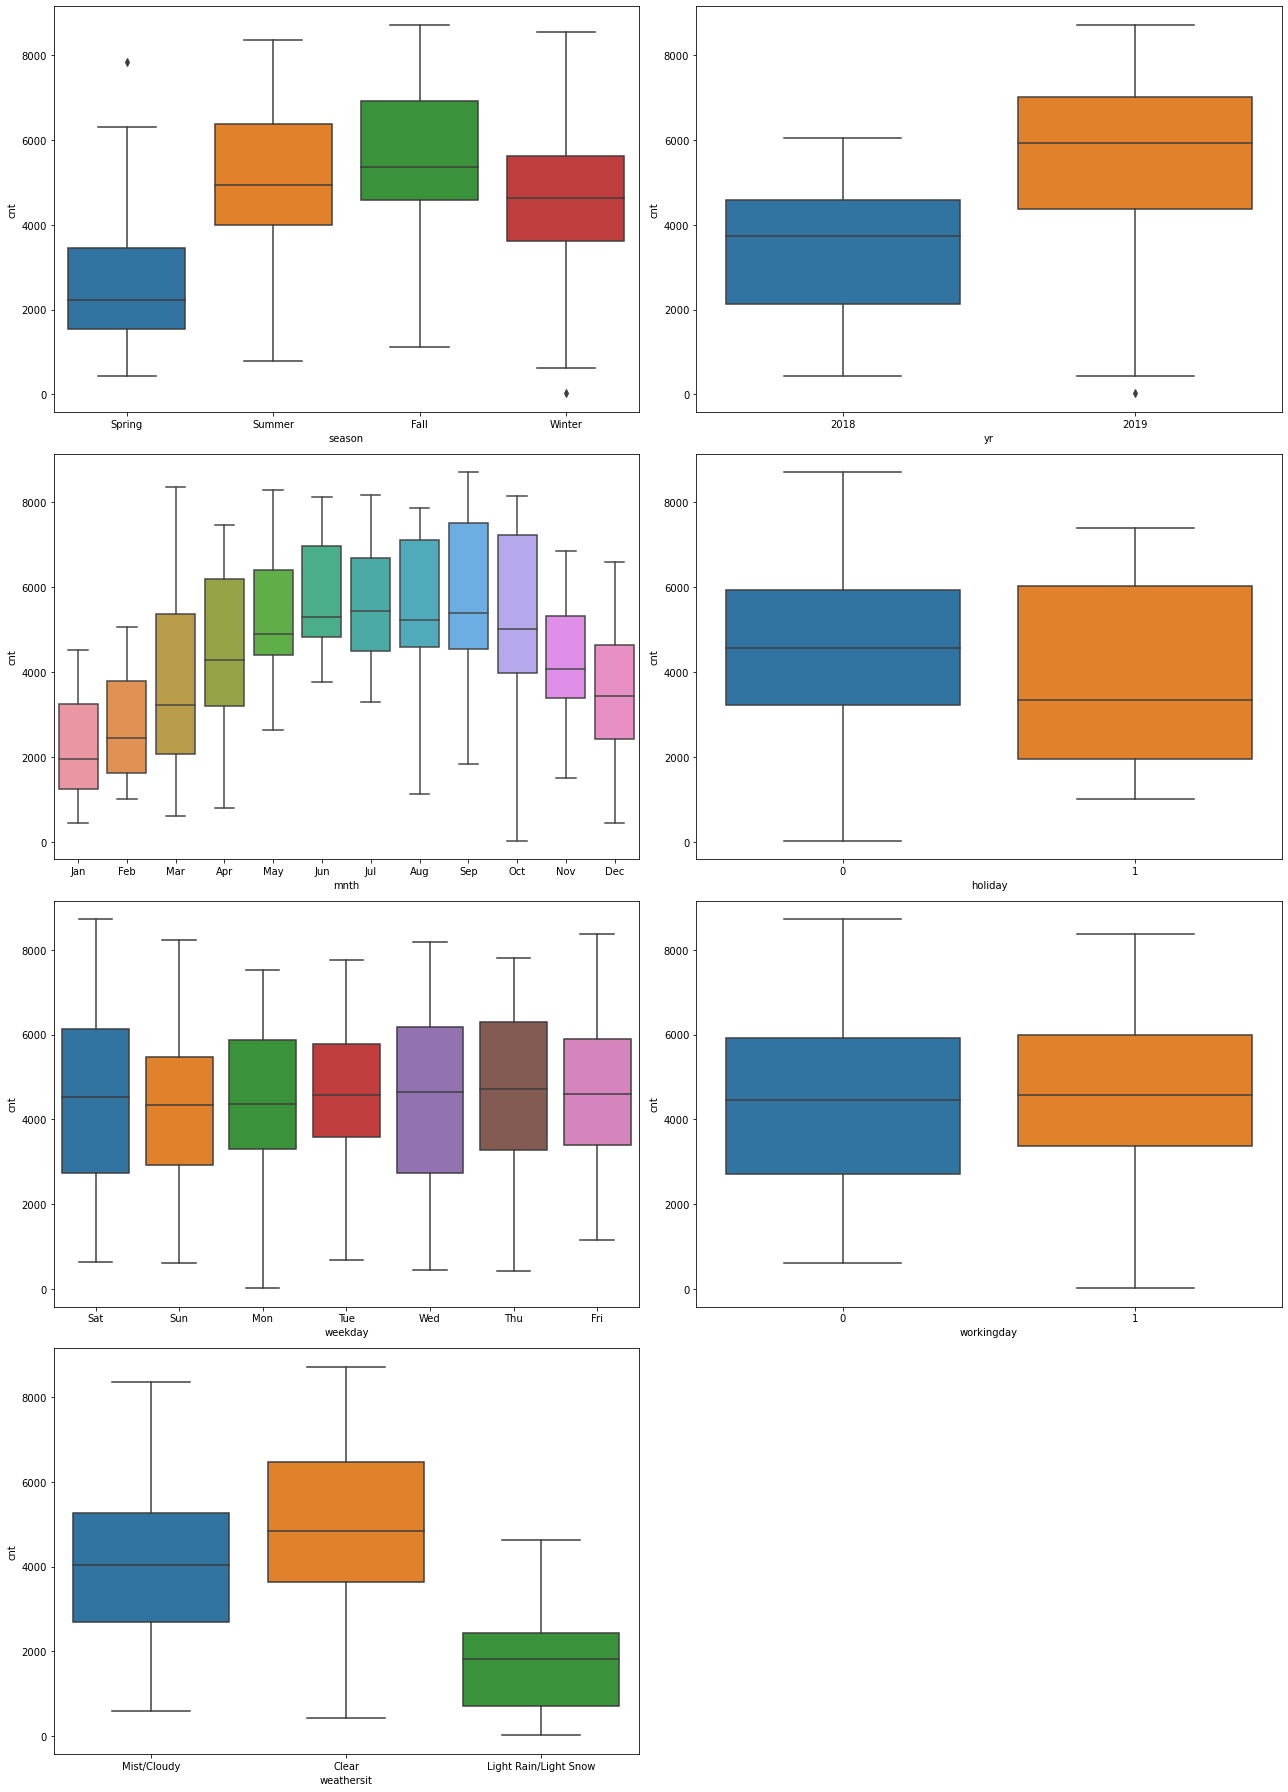

In [11]:
#Analyse the categorical variables
i=1
plt.figure(figsize=(18,25))
for var in cat_vars:
    plt.subplot(4, 2, i)
    sns.boxplot(x = var, y = 'cnt', data = bike_pre_process)
    i=i+1

plt.tight_layout()
plt.show()

## Observation:
- More users in Fall/Autumn season, followed by summer and winter.
- Spring has least number of users.
- Demand is increasing yearly.
- Demand is consitent between Months June to October, basically in Summer and Fall seasons(As per US).
- Demand is dropped during Jan and Feb months, ie in Winter(As per US).
- On an average, demand is consistent everyday. But more users are there during non-holidays and saturdays.
- Demand is more during clear weather situations and least in Rain/Snow.

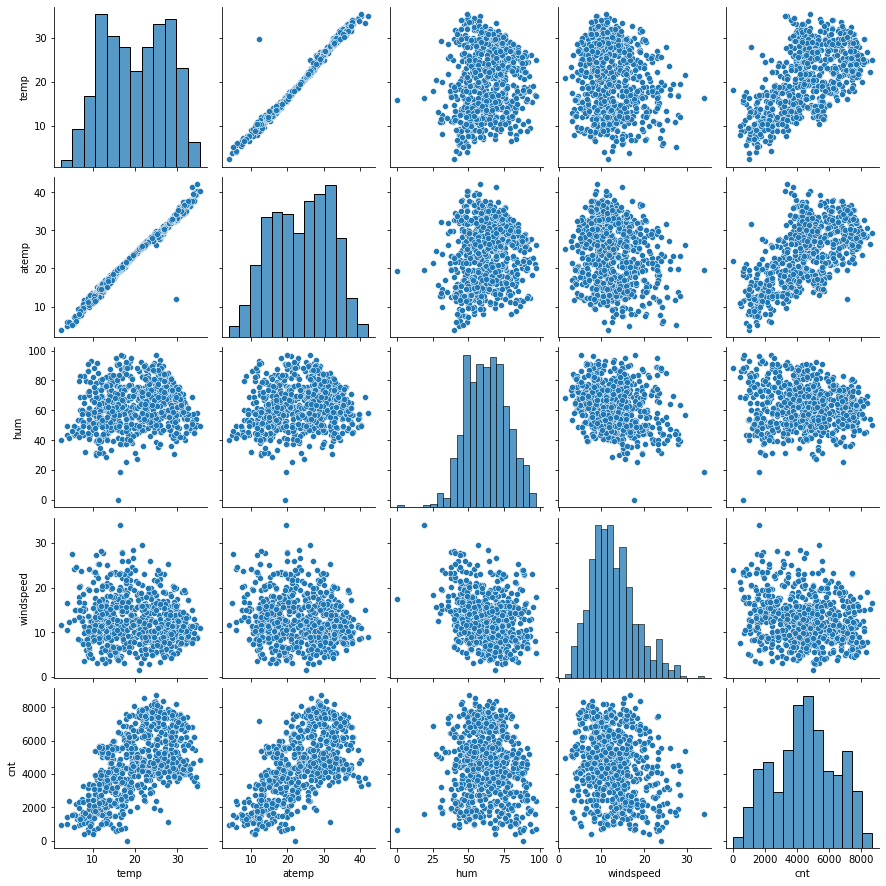

In [12]:
#Analyse numerical variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(bike_pre_process[num_vars])
plt.show()

## Observation:
- 'temp' and 'atemp' are having more correlation with each other.
- 'temp' and 'atemp' are having a similar relation with target variable, 'cnt'
- Better to drop one among 'temp' and 'atemp'.
- Users are high, when humidity, windspeed are in medium range.

### Data Preparation for model building

In [13]:
bike_model_df = bike_pre_process
model_cat_vars = cat_vars
model_num_vars = num_vars

In [14]:
#Categorical variables should be converted to numerical variables for further analysis
for var in model_cat_vars:
    print(bike_model_df[var].value_counts())

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64
2018    365
2019    365
Name: yr, dtype: int64
Mar    62
Oct    62
Jan    62
Dec    62
Aug    62
Jul    62
May    62
Nov    60
Jun    60
Sep    60
Apr    60
Feb    56
Name: mnth, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
Sun    105
Sat    105
Mon    105
Fri    104
Tue    104
Thu    104
Wed    103
Name: weekday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64
Clear                    463
Mist/Cloudy              246
Light Rain/Light Snow     21
Name: weathersit, dtype: int64


In [15]:
#Variables already having values 0,1
#holiday,workingday
#Variables need dummy variable creation
#season,yr,mnth,weekday,weathersit
bike_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


In [16]:
#Dummy variable creation
dummy_var = pd.get_dummies(bike_model_df[['season','yr','mnth','weekday','weathersit']], drop_first = True)
bike_model_df = pd.concat([bike_model_df, dummy_var], axis = 1)
bike_model_df.drop(['season','yr','mnth','weekday','weathersit'], axis = 1, inplace = True)
bike_model_df.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Rain/Light Snow',
       'weathersit_Mist/Cloudy'],
      dtype='object')

In [17]:
bike_model_df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain/Light Snow,weathersit_Mist/Cloudy
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
bike_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   holiday                           730 non-null    int64  
 1   workingday                        730 non-null    int64  
 2   temp                              730 non-null    float64
 3   atemp                             730 non-null    float64
 4   hum                               730 non-null    float64
 5   windspeed                         730 non-null    float64
 6   cnt                               730 non-null    int64  
 7   season_Spring                     730 non-null    uint8  
 8   season_Summer                     730 non-null    uint8  
 9   season_Winter                     730 non-null    uint8  
 10  yr_2019                           730 non-null    uint8  
 11  mnth_Aug                          730 non-null    uint8  
 12  mnth_Dec

## Splitting the data into Train-Test

In [19]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike_model_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


## Rescaling the features

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
# Apply min-max scalar to numerical variables

df_train[model_num_vars] = scaler.fit_transform(df_train[model_num_vars])

df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain/Light Snow,weathersit_Mist/Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation between features

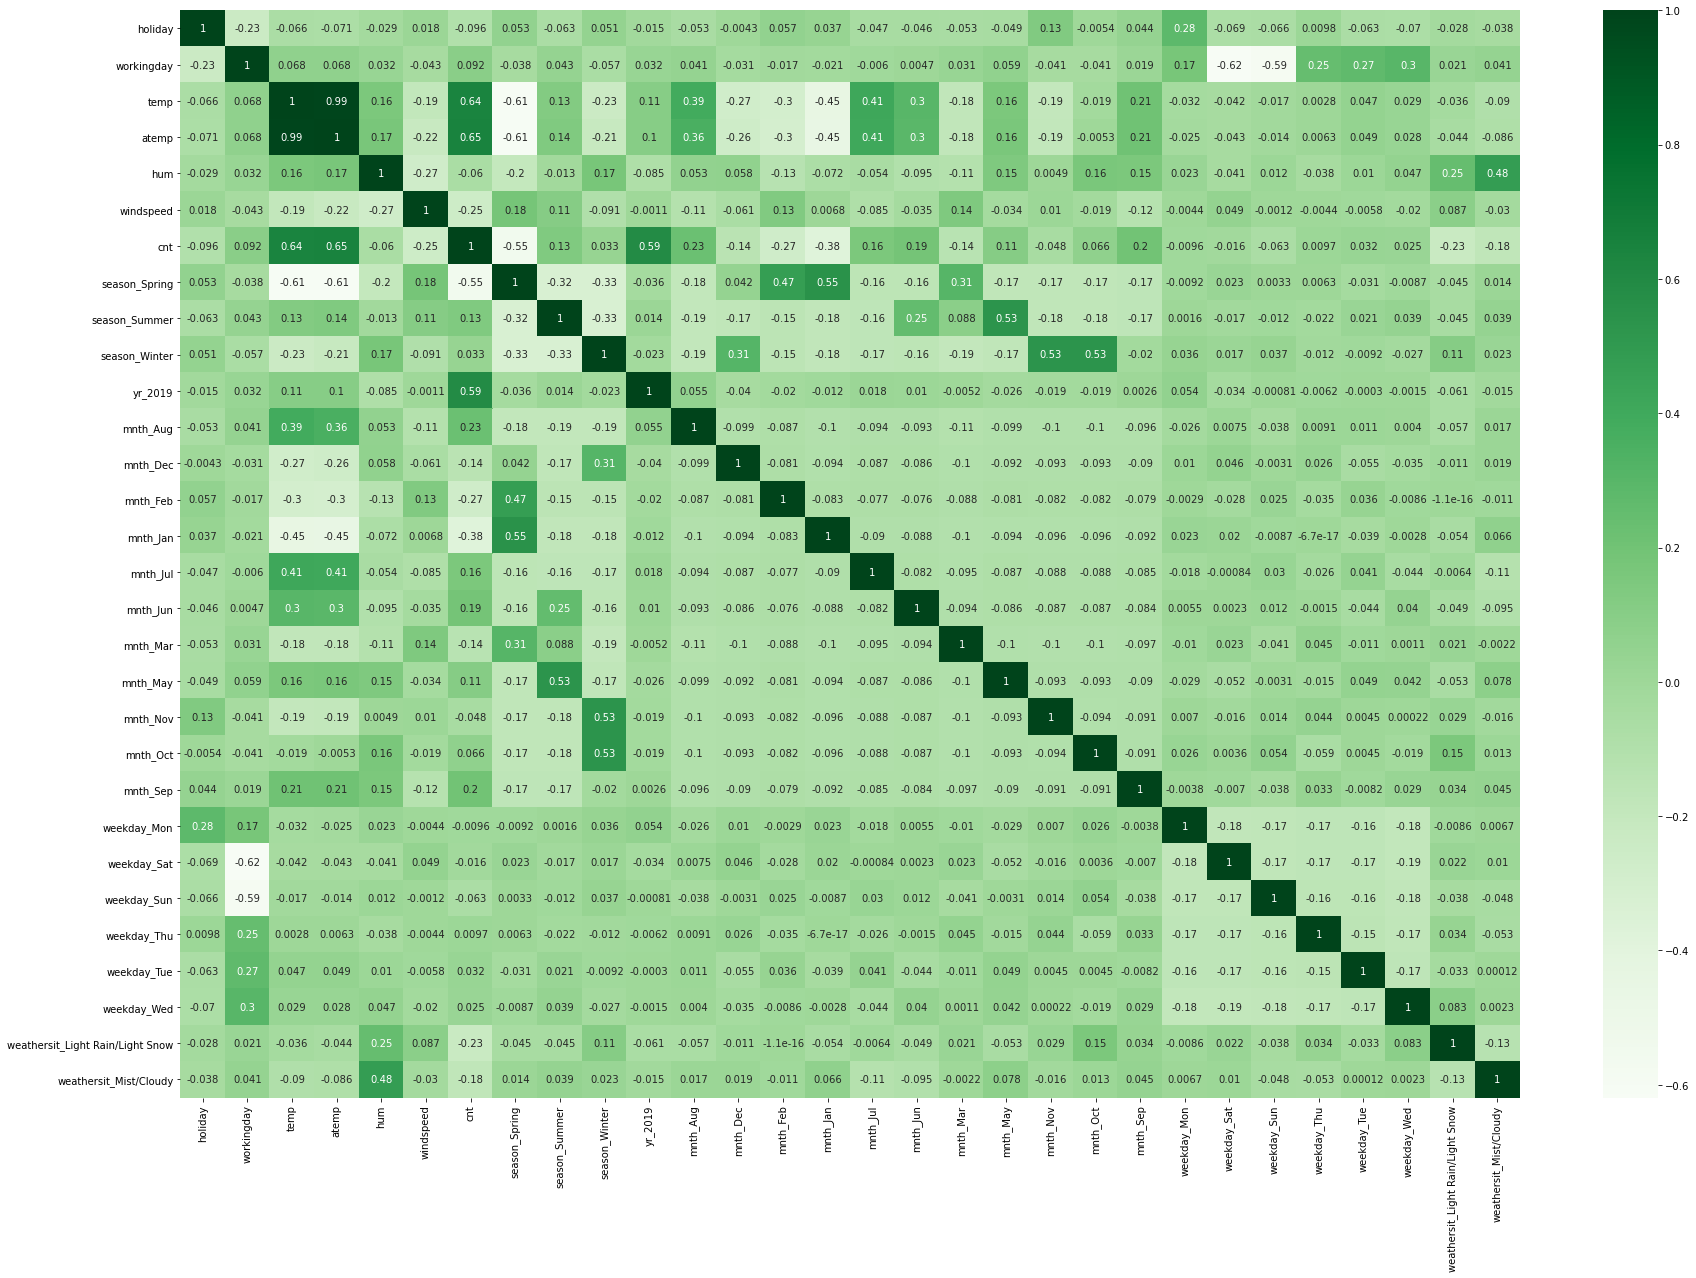

In [23]:
#Plot heatmap
plt.figure(figsize = (30,20))
sns.heatmap(df_train.corr(), annot = True, cmap="Greens")
plt.show()

## Observation:
- 'temp' has high correlation with target feature. 'atemp' and 'temp' are highly correlated.
- 'season_spring' has high negative correlation with target feature. As identified during EDA, that the demand decreases during Spring.
- 'workingday' has high negative correlation with weekday_Sat and Weekday_Sun, as these are mutually exclusive.
- 'hum' is positively related to weathersit_Mist/Cloudy
- 'windspeed' negative correlation with Target feature.
- 'season_Spring' is negatively correlated to Traget feature and 'temp'/'atemp'. Positive correlation with 'mnth_Jan', 'mnth_Feb'.
- 'season_Winter' positive correlation with 'mnth_Nov','mnth_Oct'
- Year is positively correlated to target variable.

In [24]:
#Divide to X and y
y_train = df_train.pop('cnt')
X_train = df_train

In [25]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Model Building

### RFE

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [27]:
#Output variables = All
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, step=len(X_train.columns))
rfe = rfe.fit(X_train, y_train)

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 2),
 ('season_Winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 2),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 2),
 ('mnth_Jun', False, 2),
 ('mnth_Mar', False, 2),
 ('mnth_May', False, 2),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 2),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 2),
 ('weekday_Sat', False, 2),
 ('weekday_Sun', False, 2),
 ('weekday_Thu', False, 2),
 ('weekday_Tue', False, 2),
 ('weekday_Wed', False, 2),
 ('weathersit_Light Rain/Light Snow', True, 1),
 ('weathersit_Mist/Cloudy', True, 1)]

In [29]:
len(X_train.columns[rfe.support_])

14

In [30]:
X_train.columns[rfe.support_]

Index(['holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'yr_2019', 'mnth_Dec', 'mnth_Jan', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Light Rain/Light Snow',
       'weathersit_Mist/Cloudy'],
      dtype='object')

In [31]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_Summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jul',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed'],
      dtype='object')

### Build Model - Iteration1

In [32]:
#Build model with rfe support features (14)
sel_cols = X_train.columns[rfe.support_]
X_train_sel = X_train[sel_cols]

In [33]:
#Use Stasmodels
import statsmodels.api as sm  

In [34]:
#Function to build linear regression model using statsmodels
def build_lr_model(X_train):
    #Add constant
    X_train_model = sm.add_constant(X_train)
    #Fit the model
    lr_model = sm.OLS(y_train,X_train_model).fit()
    return lr_model,X_train_model

In [35]:
lr_model1,X_train_model1 = build_lr_model(X_train_sel)

In [36]:
print(lr_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Tue, 19 Apr 2022   Prob (F-statistic):          3.28e-185
Time:                        12:11:28   Log-Likelihood:                 502.46
No. Observations:                 510   AIC:                            -974.9
Df Residuals:                     495   BIC:                            -911.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### VIF

In [37]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
def calculate_vif(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [39]:
calculate_vif(X_train_sel)

,Features,VIF
2,atemp,351.98
1,temp,349.13
3,hum,24.11
4,windspeed,4.12
6,season_Winter,2.99
5,season_Spring,2.93
13,weathersit_Mist/Cloudy,2.26
7,yr_2019,2.06
10,mnth_Nov,1.82
9,mnth_Jan,1.73


## Observation:

- R-squared:                       0.838
- Adj. R-squared:                  0.833
- F-statistic:                     182.7
- Higher VIF > 5:
    - atemp	360.46
    - temp	352.99
    - hum	17.40
- High p-value:
    - temp  - 0.021
    - atemp - 0.524

In [40]:
##Drop 'atemp' as it has high vif and p-value 
#atemp highly correlated to temp. Should reduce the VIF for temp
X_train_sel2 = X_train_sel.drop(['atemp'], axis=1)

### Building model - Iteration2

In [41]:
lr_model2,X_train_model2 = build_lr_model(X_train_sel2)

In [42]:
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 19 Apr 2022   Prob (F-statistic):          2.80e-186
Time:                        12:11:32   Log-Likelihood:                 502.25
No. Observations:                 510   AIC:                            -976.5
Df Residuals:                     496   BIC:                            -917.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [43]:
calculate_vif(X_train_sel2)

,Features,VIF
2,hum,23.57
1,temp,14.20
3,windspeed,4.03
5,season_Winter,2.97
4,season_Spring,2.93
12,weathersit_Mist/Cloudy,2.26
6,yr_2019,2.06
9,mnth_Nov,1.82
8,mnth_Jan,1.73
7,mnth_Dec,1.53


In [44]:
#R-squared remain same, F-statistic increased
#R-squared:                       0.838
#Adj. R-squared:                  0.833
#F-statistic:                     197.0

#p-value reduced

#vif of temp reduced and vif of hum increased
#hum - 23.57
#temp - 14.20

#hum - positively correlated with weathersit features

In [45]:
#hum has high VIF
#Dropping hum
X_train_sel3 = X_train_sel2.drop(['hum'], axis=1)

### Building model - Iteration3

In [46]:
lr_model3,X_train_model3 = build_lr_model(X_train_sel3)

In [47]:
print(lr_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.9
Date:                Tue, 19 Apr 2022   Prob (F-statistic):          6.19e-185
Time:                        12:11:37   Log-Likelihood:                 496.28
No. Observations:                 510   AIC:                            -966.6
Df Residuals:                     497   BIC:                            -911.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [48]:
#Check vif again
calculate_vif(X_train_sel3)

,Features,VIF
2,windspeed,3.99
1,temp,3.79
4,season_Winter,2.50
3,season_Spring,2.36
5,yr_2019,2.06
8,mnth_Nov,1.80
7,mnth_Jan,1.64
11,weathersit_Mist/Cloudy,1.51
6,mnth_Dec,1.46
9,mnth_Sep,1.17


In [49]:
#R-Squared reduced, F-Statistic increased
#R-squared:                       0.834
#Adj. R-squared:                  0.830
#F-statistic:                     207.9

#few features has p-values > 0. Drop the feature with p-values > 0
#holiday      - 0.001
#mnth_Dec     - 0.002
#mnth_Jan     - 0.001
#mnth_Nov     - 0.005

#vif reduced to <5

In [50]:
#mnth_Nov has high p-value
#Drop mnth_Nov
X_train_sel4 = X_train_sel3.drop(['mnth_Nov'], axis=1)

### Building Model - Iteration4

In [51]:
lr_model4,X_train_model4 = build_lr_model(X_train_sel4)

In [52]:
print(lr_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.1
Date:                Tue, 19 Apr 2022   Prob (F-statistic):          1.89e-184
Time:                        12:11:41   Log-Likelihood:                 492.32
No. Observations:                 510   AIC:                            -960.6
Df Residuals:                     498   BIC:                            -909.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [53]:
#Check vif again
calculate_vif(X_train_sel4)

,Features,VIF
2,windspeed,3.95
1,temp,3.77
3,season_Spring,2.35
5,yr_2019,2.06
7,mnth_Jan,1.64
4,season_Winter,1.61
10,weathersit_Mist/Cloudy,1.51
6,mnth_Dec,1.29
8,mnth_Sep,1.16
9,weathersit_Light Rain/Light Snow,1.08


In [54]:
#R-Squared reduced, F-statistic increased
#R-squared:                       0.831
#Adj. R-squared:                  0.828
#F-statistic:                     223.1

#p-value for mnth_Dec increased
#mnth_Dec     - 0.023
#mnth_Jan     - 0.002

#vif reduced. Remained < 5

In [55]:
#mnth_Dec has high p-value
#drop mnth_Dec
X_train_sel5 = X_train_sel4.drop(['mnth_Dec'], axis=1)

### Building Model - Iteration5

In [56]:
lr_model5,X_train_model5 = build_lr_model(X_train_sel5)

In [57]:
print(lr_model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.8
Date:                Tue, 19 Apr 2022   Prob (F-statistic):          1.58e-184
Time:                        12:11:44   Log-Likelihood:                 489.65
No. Observations:                 510   AIC:                            -957.3
Df Residuals:                     499   BIC:                            -910.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [58]:
#Check vif again
calculate_vif(X_train_sel5)

,Features,VIF
2,windspeed,3.95
1,temp,3.76
3,season_Spring,2.24
5,yr_2019,2.06
6,mnth_Jan,1.60
9,weathersit_Mist/Cloudy,1.51
4,season_Winter,1.37
7,mnth_Sep,1.16
8,weathersit_Light Rain/Light Snow,1.08
0,holiday,1.04


In [59]:
#R-Squared slightly reduced, F-statistic increased
#R-squared:                       0.830
#Adj. R-squared:                  0.826
#F-statistic:                     242.8

#p-value for most of the features are 0
#mnth_Jan - 0.008 - p-value increased
#season_Winter - 0.001 - increased to > 0

#vif reduced. Remained < 5

In [60]:
#mnth_Jan has high p-value
#drop mnth_Jan
X_train_sel6 = X_train_sel5.drop(['mnth_Jan'], axis=1)

### Building Model - Iteration6

In [61]:
lr_model6,X_train_model6 = build_lr_model(X_train_sel6)

In [62]:
print(lr_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.7
Date:                Tue, 19 Apr 2022   Prob (F-statistic):          3.31e-184
Time:                        12:11:49   Log-Likelihood:                 486.00
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     500   BIC:                            -909.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [63]:
calculate_vif(X_train_sel6)

,Features,VIF
2,windspeed,3.94
1,temp,3.75
5,yr_2019,2.05
3,season_Spring,1.65
8,weathersit_Mist/Cloudy,1.50
4,season_Winter,1.37
6,mnth_Sep,1.16
7,weathersit_Light Rain/Light Snow,1.08
0,holiday,1.04


In [64]:
#R-Squared is a good score and F-statistic is also high. Probability is too less.
#R-squared:                       0.827
#Adj. R-squared:                  0.824
#F-statistic:                     265.7

#p-value for all features are 0 ie they are significant

#vif is less than 5. ie. Less multicollinearity between features.

#This is considered as the final model (lr_model6)

In [65]:
#Final Features and coefficients
lr_model6.params

const                               0.267078
holiday                            -0.097018
temp                                0.407826
windspeed                          -0.135566
season_Spring                      -0.116181
season_Winter                       0.047958
yr_2019                             0.235355
mnth_Sep                            0.069984
weathersit_Light Rain/Light Snow   -0.288462
weathersit_Mist/Cloudy             -0.078597
dtype: float64

In [66]:
#Equation of the model
formula = 'cnt='
i=0
for param in lr_model6.params.index:
    if param == 'const':
        formula = formula+str(round(lr_model6.params[i],5))+'+'
    else:
        formula = formula+param+'*'+str(round(lr_model6.params[i],5))+'+'
    i = i+1

print('Equation: ',formula.rstrip('+'))

Equation:  cnt=0.26708+holiday*-0.09702+temp*0.40783+windspeed*-0.13557+season_Spring*-0.11618+season_Winter*0.04796+yr_2019*0.23536+mnth_Sep*0.06998+weathersit_Light Rain/Light Snow*-0.28846+weathersit_Mist/Cloudy*-0.0786


#### Coefficient Interpretation
- holiday*-0.09702  
One unit increase in holiday will decrease the Bike Share users by 0.09702 unit  
- temp*0.40783  
One unit increase in temperature will increase the Bike Share users by 0.40783 unit  
- windspeed*-0.13557  
One unit increase in windspeed will decrease the Bike Share users by 0.13557 unit
- season_Spring*-0.11618  
One unit increase in Spring season will decrease the Bike Share users by 0.11618 unit
- season_Winter*0.04796  
One unit increase in winter season will increase the Bike Share users by 0.04796 unit
- yr_2019*0.23536  
One unit increase in year_2019 will increase the Bike Share users by 0.23536 unit
- mnth_Sep*0.06998  
One unit increase in mnth_Sep will increase the Bike Share users by 0.06998 unit
- weathersit_Light Rain/Light Snow*-0.28846  
One unit increase in Light Rain/Light Snow weather situation will decrease the Bike Share users by 0.28846 unit
- weathersit_Mist/Cloudy*-0.0786  
One unit increase in misty/cloudy weather situation will decrease the Bike Share users by 0.0786 unit

#### Top 3 Features
1. temp
2. weathersit_Light Rain/Light Snow
3. yr_2019

##### Next important features
- windspeed
- season_Spring

## Result Interpretation

1. All the coefficients of the final features are non-zero, which indicates that there is relationship between the selected features and the number of boom bike users.
2. 83% of variance in Number of users is explained by the final features.
3. The model is best fit with Adjusted R-squared: 0.82
4. The standard Error is <0.03, indicating the coefficients are accurate
5. Prob(Omnibus)= 0.000, represents the errors are normally distributed.
6. Durbin-Watson = 2.041, represents the no autocorrelation.

## Verify the Assumptions

### 1. Error Terms normally distributed

In [67]:
#Predict y for train data
y_train_pred = lr_model6.predict(X_train_model6)

In [68]:
y_train_pred.head()

653    0.717559
576    0.798997
426    0.453459
728    0.396316
482    0.559648
dtype: float64

In [69]:
residual = y_train - y_train_pred

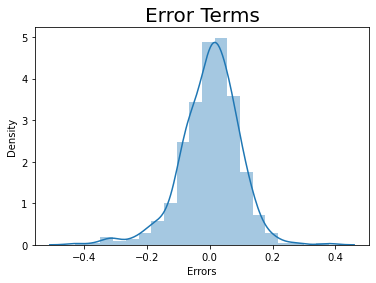

In [70]:
# Plot distribution for error
fig = plt.figure()
sns.distplot(residual, bins = 20)
plt.title('Error Terms', fontsize = 20) 
plt.xlabel('Errors')
plt.show()

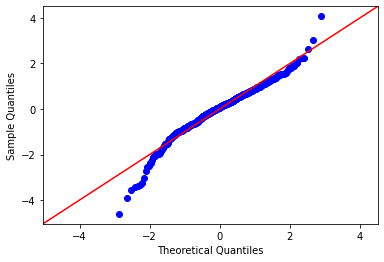

In [71]:
#Residual relationship
sm.qqplot(residual, fit = True, line = "45")
plt.show()

Error terms are normally distributed with a slighter deviation towards left

### 2. Homoscedasticity

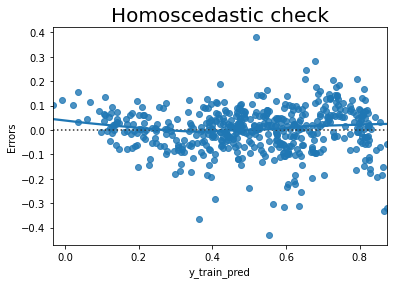

In [72]:
sns.residplot(y_train_pred, residual,lowess=True)
plt.title('Homoscedastic check', fontsize = 20)
plt.xlabel('y_train_pred')
plt.ylabel('Errors')
plt.show()

The Error variance is with similar distance to line at error 0. The model is nearly homoscedastic

### 3. Independence of Errors - Autocorrelation

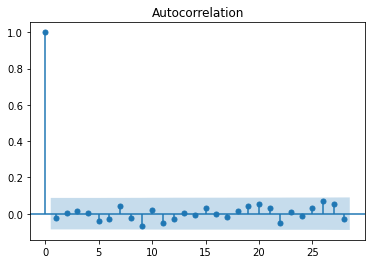

In [73]:
import statsmodels.tsa.api as smt
smt.graphics.plot_acf(residual, alpha=0.05)
plt.show()

The correlation plot indicates that residuals/errors are independent of each other.

### 4. Linear relationship between X and y

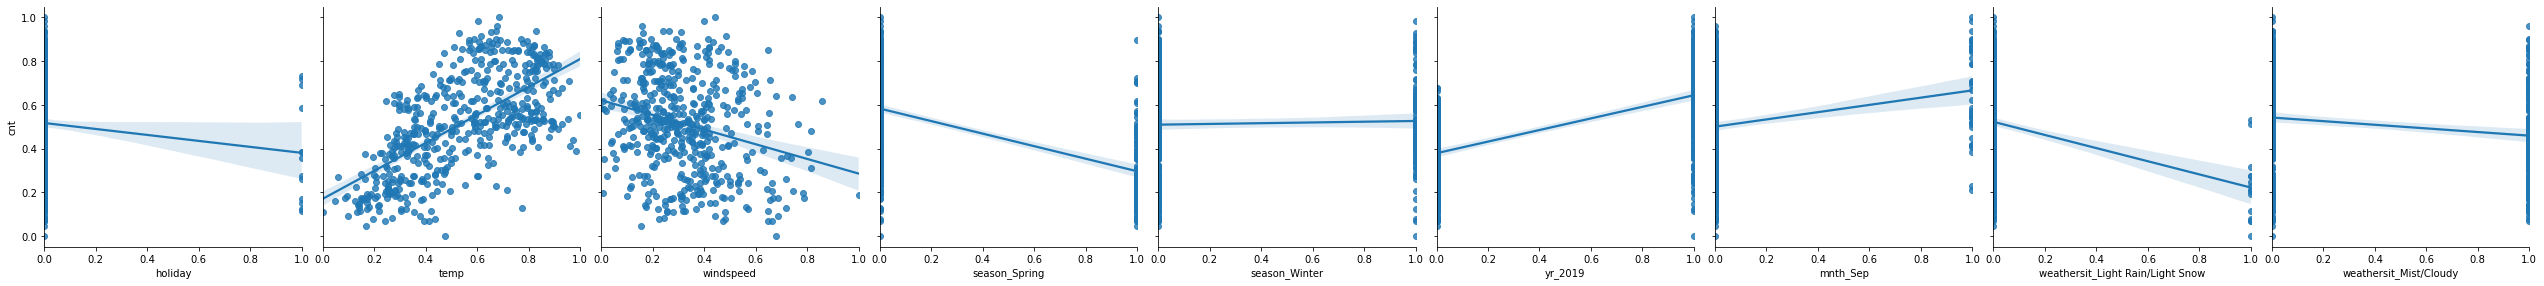

In [74]:
data = X_train_sel6.copy(deep=True)
data['cnt'] = y_train
sns.pairplot(data, x_vars=X_train_sel6.columns, y_vars='cnt', size=4, aspect = 1, kind='reg', diag_kind=None)

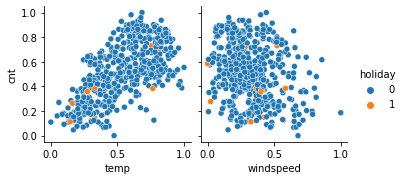

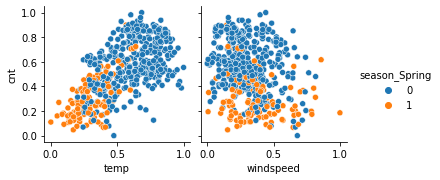

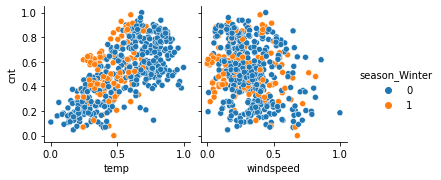

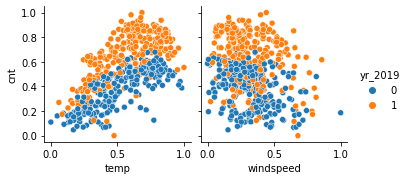

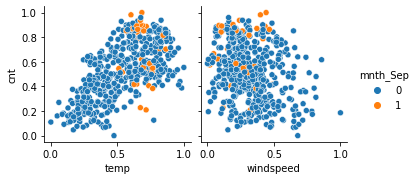

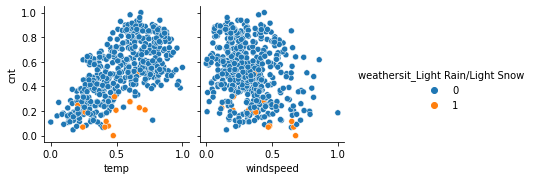

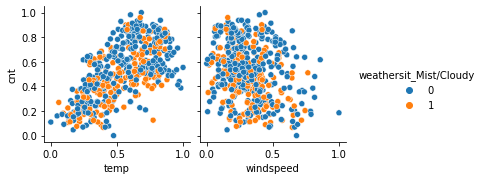

In [75]:
for var in ['holiday','season_Spring','season_Winter','yr_2019','mnth_Sep','weathersit_Light Rain/Light Snow', 'weathersit_Mist/Cloudy']:
    sns.pairplot(data=data, y_vars = 'cnt', x_vars = ['temp','windspeed'],hue=var, diag_kind= None)
    plt.show()

Temperature is linearly related to Count of Users. Wind speed has less linear relation with count of users.

### 5. Multicollinearity

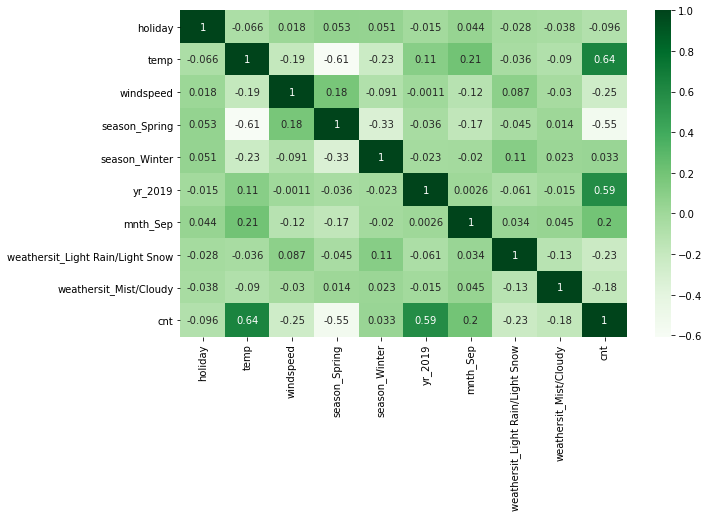

In [76]:
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(), annot = True, cmap="Greens")
plt.show()

The correlation value is very less and < 2 (both positive and negative) and most are near to 0. Hence, multicollinearity does not exist.

## Prediction

### Transforming Test Data

In [77]:
#scaling the test data
# Apply min-max scalar to numerical variables

df_test[model_num_vars] = scaler.transform(df_test[model_num_vars])

df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain/Light Snow,weathersit_Mist/Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
#Divide to X and y
y_test = df_test.pop('cnt')
X_test = df_test

In [79]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [80]:
#Remove the dropped features
X_test_sel6 = X_test[X_train_sel6.columns]

In [81]:
#Predict
X_test_model6 = sm.add_constant(X_test_sel6)
y_test_pred = lr_model6.predict(X_test_model6)

## Model Evaluation

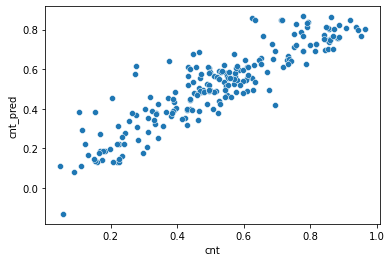

In [82]:
# Plot spread of y_test and y_test_pred
fig = plt.figure()
sns.scatterplot(y_test,y_test_pred)
plt.ylabel('cnt_pred')
plt.show()

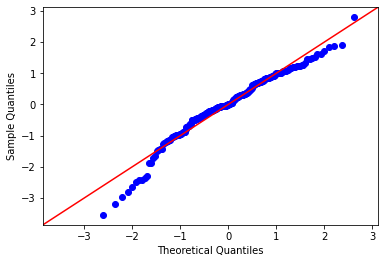

In [83]:
sm.qqplot(y_test-y_test_pred, fit = True, line = "45")
plt.show()

There is a linear relationship between the actual and predicted values of test data

In [84]:
#Model metrics for test dataset
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_pred))
# R-squared
r2=r2_score(y_test, y_test_pred)
print("R-squared: %.2f" % r2)
#Adjusted R-squared
adj_r2 = 1 - ((1-r2) * ((X_test_sel6.shape[0]-1)/(X_test_sel6.shape[0]-X_test_sel6.shape[1]-1)))
print("Adjusted R-squared: %.2f" % adj_r2)

Mean squared error: 0.01
R-squared: 0.80
Adjusted R-squared: 0.80


In [85]:
#Model metrics for train dataset
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_train_pred))
# R-squared
r2=r2_score(y_train, y_train_pred)
print("R-squared: %.2f" % r2 )
#Adjusted R-squared
adj_r2 = 1 - ((1-r2) * ((X_train_sel6.shape[0]-1)/(X_train_sel6.shape[0]-X_train_sel6.shape[1]-1)))
print("Adjusted R-squared: %.2f" % adj_r2)

Mean squared error: 0.01
R-squared: 0.83
Adjusted R-squared: 0.82


## Final Model

#### Scores on Test data
R-squared: 0.80  
Adjusted R-squared: 0.80  
Mean squared error: 0.01  
    
#### Scores on Train Data
R-squared: 0.83   
Adj. R-squared: 0.82  
Mean squared error: 0.01  

##### The scores have a difference of ~0.02 between test and train data. 

#### Top Features contributing for the demand of boom bike users
(In the order of the importance)
- Temperature (in Celsius)
- Weather Situation : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- year_2019
- windspeed
- Spring Season
- holiday
- Weather Situation : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- September Month
- Winter Season